In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


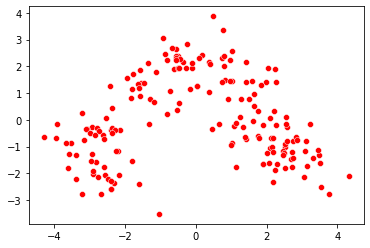

In [ ]:
df = StandardScaler().fit_transform(df)
pca = PCA(2)
prim = pca.fit_transform(df)
sns.scatterplot(x=prim[:, 0], y=prim[:, 1], color='red', lw=0.1)

In [ ]:
aff = AffinityPropagation()
clustering = aff.fit(df)
centroids_aff = pca.transform(clustering.cluster_centers_)
print("Affinity propagation Silhouette:", silhouette_score(df, clustering.labels_))

Affinity propagation Silhouette: 0.12094943296335095


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


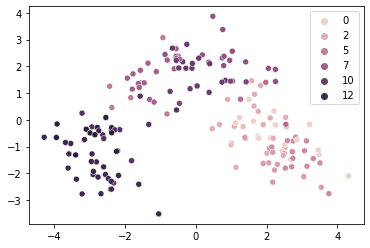

In [ ]:
sns.scatterplot(prim[:, 0], prim[:, 1], hue=aff.labels_)

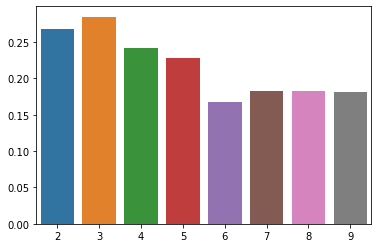

In [ ]:
silh = {}
inertia = {}
for i in range(2, 10):
  kmeans = KMeans(i, random_state=42)
  kmeans.fit(df)
  silh[i] = silhouette_score(df, kmeans.labels_)
  inertia[i] = kmeans.inertia_
sns.barplot(x=list(silh.keys()), y=list(silh.values()))

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


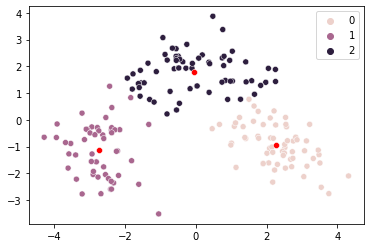

In [ ]:
kmeans = KMeans(3, random_state=42)
kmeans.fit(df)
centroids_kmeans = pca.transform(kmeans.cluster_centers_)
sns.scatterplot(prim[:, 0], prim[:, 1], hue=kmeans.labels_)
sns.scatterplot(centroids_kmeans[:, 0], centroids_kmeans[:, 1], markers='x', color='red', linewidths=3)